# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline

#never print matching warnings
warnings.filterwarnings('ignore') 

#set how pandas displays data
pd.options.display.max_columns = 100
pd.options.display.max_rows = 35
pd.options.display.width = 120

#set to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#import seaborn to draw pretty graphs
import seaborn as sns
sns.set_style('whitegrid')

In [11]:
_='''

Parameters for Random Forest Regression

*** n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion, and "mae" for the mean
    absolute error.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

*** max_features : int, float, string or None, optional (default="auto")
    The number of features to consider when looking for the best split:

    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a percentage and
      `int(max_features * n_features)` features are considered at each
      split.
    - If "auto", then `max_features=n_features`.
    - If "sqrt", then `max_features=sqrt(n_features)`.
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

*** max_depth : integer or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a percentage and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split

min_samples_leaf : int, float, optional (default=1)
    The minimum number of samples required to be at a leaf node:

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a percentage and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

min_weight_fraction_leaf : float, optional (default=0.)
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_leaf_nodes : int or None, optional (default=None)
    Grow trees with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_split : float, optional (default=1e-7)
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

bootstrap : boolean, optional (default=True)
    Whether bootstrap samples are used when building trees.

oob_score : bool, optional (default=False)
    whether to use out-of-bag samples to estimate
    the R^2 on unseen data.

n_jobs : integer, optional (default=1)
    The number of jobs to run in parallel for both `fit` and `predict`.
    If -1, then the number of jobs is set to the number of cores.

random_state : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

verbose : int, optional (default=0)
    Controls the verbosity of the tree building process.

warm_start : bool, optional (default=False)
    When set to ``True``, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit a whole
    new forest.
    
'''

# Load data

In [4]:
path='/Users/juliannefreeman/Desktop/to_share/'
os.chdir(path)
data=pd.read_csv('challenge_3_abalone.csv')
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# checking for null values

In [7]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Rings_class       0
dtype: int64

# To turn this into a classification problem, I made the rings above a number one class and rings below the number another class


In [5]:
def define_class(data):
    if data>9: return int(1)
    else: return int(0)

data['Rings_class']=data['Rings'].apply(func=define_class)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [8]:
data['Rings_class'].value_counts()

0    2096
1    2081
Name: Rings_class, dtype: int64

# Create dummy variables

In [27]:
# create dummy variables for categorical variables
tmp=pd.get_dummies(data['Sex'])
data['Sex_F']=tmp['F']
data['Sex_I']=tmp['I']
data['Sex_M']=tmp['M']
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_class,Sex_F,Sex_I,Sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1,0


# Random Forest Regression

### dependent variables

In [28]:
indvar=[
    #'Sex',   # categorical variable
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Sex_F',
    'Sex_I',
    'Sex_M'
    ]

### independent variables

In [29]:
depvar=['Rings'] # continuous variable

# Heatmap

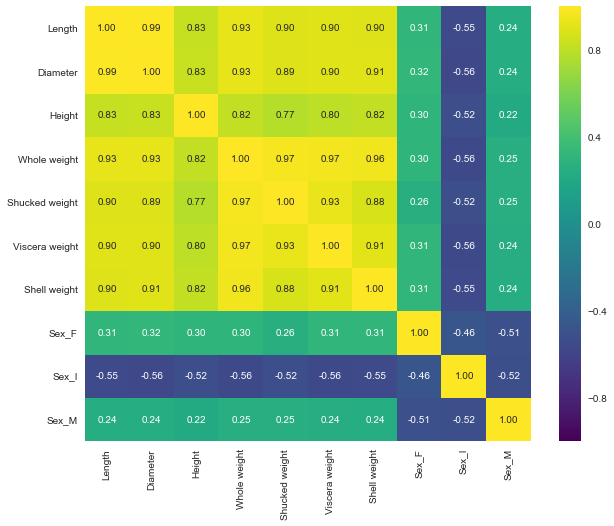

In [30]:
#view correlation of variables
fig, ax1 = plt.subplots(1,1,figsize=(10,8))
_=sns.heatmap(data[indvar].corr(), annot=True, fmt = ".2f", cmap = "viridis", ax=ax1)

## PREP DATA

In [44]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X=data[indvar]
y=data[depvar]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: \t %f' % len(X_train))
print('Length of test set: \t %f\n' % len(X_test))

# do not need to scale data

Length of train set: 	 3341.000000
Length of test set: 	 836.000000



## FIT MODEL

In [45]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## VALIDATE MODEL

In [52]:
# validate model
ytest_true, ytest_pred = np.asarray(y_test), random_forest.predict(X_test)
ytest_true= [x for xs in np.array(ytest_true) for x in xs]

# R2
print('from random forest\n')
print('\tscore: %f\n' % random_forest.score(X_test, y_test))

'''Returned the coefficient of determination R^2 of the prediction.'''

# R2, mean abs error, mean sqr error
print('from sklearn.metrics\n')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\tmean abs error: %f\n' % mean_absolute_error(ytest_true, ytest_pred))
print('\tmean sqr error: %f\n' % mean_squared_error(ytest_true, ytest_pred))

from random forest

	score: 0.530998



'Returned the coefficient of determination R^2 of the prediction.'

from sklearn.metrics

	mean abs error: 3.411489

	mean sqr error: 14.379182



# Feature importance

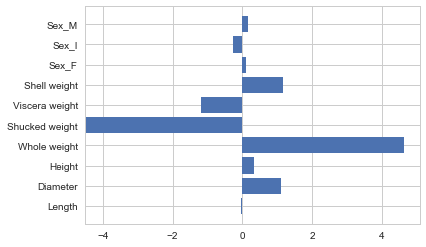

In [40]:
# view feature importance
def f_importances(coef, names):
    plt.barh(range(len(names)), coef, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(linreg.coef_[0], indvar)